# EasyOCR License Images Extraction

In [1]:
import os
import easyocr
import cv2
reader = easyocr.Reader(["en"])

/home/robin/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## For Single Image

In [2]:
img = cv2.imread("britishp.jpg")
#img = cv2.resize(img,(700,700))
#reader = easyocr.Reader(["en"])
result = reader.readtext(img,paragraph=False)
#print(result)
for (bbox,text,prob) in result:
    (t1,tr,br,b1) = bbox

    t1 = (int(t1[0]), int(t1[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[0]))
    b1 = (int(b1[0]), int(b1[1]))
    
    #Remove non-ASCII characters to display clean text on the image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    print("text",text)
    cv2.rectangle(img,tr,b1,(0,255,0),2)
    cv2.putText(img,text,(b1[0],b1[1]-20),cv2.FONT_HERSHEY_SIMPLEX,1,(250,0,0),1)
    #img1 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

text TFREITNLIS
text GBR
text 760621560
text St HELENA
text SPECIMEN
text ANGELA
text BRITISH OVERSEAS
text TERRITORIES
text 017"SEP
text SEP
text St HELENA
text 10 MAR /MARS
text HELENA
text 10 MAR /MARS 25
text P<GBRST<HE
text ENA<SPEC IMEN<<ANGELA<ZOE<<<<<<<<<
text 7606415605G8R8809117F2503103<<<<<<<<<<<<<<08


In [27]:
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread("britishp.jpg")
result = reader.readtext(img,paragraph=False)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#dst1 = cv2.fastNlMeansDenoisingColored(gray,None,6,6,7,21)
dst2 = cv2.fastNlMeansDenoisingColored(img,None,6,6,7,21)
cv2.imshow("dst1",img)
cv2.imshow("dst2",dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
all_text = []

result = reader.readtext(img,paragraph=False)
#print(result)
for (bbox,text,prob) in result:
    (t1,tr,br,b1) = bbox

    t1 = (int(t1[0]), int(t1[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[0]))
    b1 = (int(b1[0]), int(b1[1]))
    
    #Remove non-ASCII characters to display clean text on the image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    print("text",text)
    all_text.append(text)
    

text TFREITNLIS
text GBR
text 760621560
text St HELENA
text SPECIMEN
text ANGELA
text BRITISH OVERSEAS
text TERRITORIES
text 017"SEP
text SEP
text St HELENA
text 10 MAR /MARS
text HELENA
text 10 MAR /MARS 25
text P<GBRST<HE
text ENA<SPEC IMEN<<ANGELA<ZOE<<<<<<<<<
text 7606415605G8R8809117F2503103<<<<<<<<<<<<<<08


In [20]:
all_text[2]

'760621560'

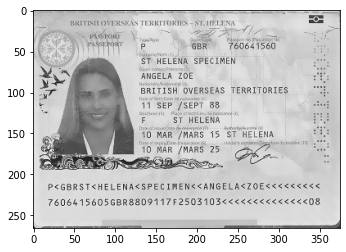

In [31]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter,cv2.COLOR_BGR2RGB))

In [32]:
result = reader.readtext(bfilter,paragraph=False)
#print(result)
for (bbox,text,prob) in result:
    (t1,tr,br,b1) = bbox

    t1 = (int(t1[0]), int(t1[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[0]))
    b1 = (int(b1[0]), int(b1[1]))
    
    #Remove non-ASCII characters to display clean text on the image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    print("text",text)
    #cv2.rectangle(img,tr,b1,(0,255,0),2)
    #cv2.putText(img,text,(b1[0],b1[1]-20),cv2.FONT_HERSHEY_SIMPLEX,0.4,(250,0,0),2)
    #img1 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)


text #RETISII O)VERSESTERRITOKIE
text JELEN
text ASFOk
text GBR
text 760621560
text St HELENA
text SPECIMEN
text ANGELA ZOE
text BRITISH OVERSEAS
text TERRITORIES
text 117" SEP
text SEP
text St HELENA
text 010 MAR
text {MARS
text S7  HEIENA
text 010 MAR" /MARS
text P<GBRST<HE
text ENA<SPEC IMEN<<ANGELA<ZOE<<<<<<<<<
text 76064156D5G8R8809117F2503103<<<<<<<<<<<<<<08


In [17]:
img1 = cv2.imread("nzpassport.png")
# gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img1, (3,3),0)


img_num = 1

dst = cv2.fastNlMeansDenoisingColored(img1,None,6,6,7,21)
#cv2.imshow("Fast means Denoising",dst)

# # apply morphology
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# morph = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)

result = reader.readtext(dst,paragraph=False)
#print(result)
for (bbox,text,prob) in result:
    (t1,tr,br,b1) = bbox

    t1 = (int(t1[0]), int(t1[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[0]))
    b1 = (int(b1[0]), int(b1[1]))

    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    print(text)
#     img_scaled = cv2.resize(img,None,fx = 2,fy = 2,interpolation=cv2.INTER_CUBIC)
#     cv2.imshow("scaling_Cubic interpolation",img_scaled)

    #cv2.rectangle(img1,tr,b1,(0,255,0),2)
    
    #cv2.putText(img1,text,(b1[0],b1[1]-20),cv2.FONT_HERSHEY_SIMPLEX,0.4,(250,0,0),1,cv2.LINE_AA,False)
    #cv2.imwrite(os.path.join(out_path,"Partial_Output_img_num.png"),img)
    
#cv2.imshow("real",img)
cv2.imshow("image",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


4t Ut E
NEW ZEAL AND
AOTEAROA
KNA
Uan
unwha  e
NZL
LDQ01 1 48
WHAKAATURANGA
FRED
WIREMU
John
NEW
ZEALAND
Wvan RE
28
FEB
1964
TAIHAPE
Le 0E
ulu
05
oct
2009
05
oct
2014
DIA
WLG
P<nzLwhaKAATURANGA<<FRED<WIREMU<John<<<<<<<<
Ldo01148<2nzL6402282m1410055<<<<<<<<<<<<<<00


## All Files

In [21]:
import glob
import easyocr
import cv2
import os

path = "/home/robin/Desktop/assignment/License Images/*.*"
new_reader = easyocr.Reader(["en"])


for i,file in enumerate(glob.glob(path)):
    img = cv2.imread(file)
    dst = cv2.fastNlMeansDenoisingColored(img,None,6,6,7,21)
    results = new_reader.readtext(img,paragraph=False)
    #print(results)
    for (bbox,text,prob) in results:
        (t1,tr,br,b1) = bbox

        t1 = (int(t1[0]), int(t1[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[0]))
        b1 = (int(b1[0]), int(b1[1]))

        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(img, tr, b1, (0, 255, 0), 2)
        cv2.putText(img, text, (t1[0], t1[1] - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (250, 0, 0),1,cv2.LINE_AA,False)
        

        #cv2.imwrite(os.path.join(out_path,"Partial_Output.png"),img)
    cv2.imwrite(f'/home/robin/Desktop/assignment/efg/Partial_Output_{i}.png',img)
    #cv2.imshow("imgaes",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
from passporteye import read_mrz

In [14]:
# Process image
#mrz = read_mrz("britishp.jpg")
mrz = read_mrz("nzpassport.png")
# Obtain image
mrz_data = mrz.to_dict()

print('Nationality :'+ mrz_data['nationality'])
print('Given Name :'+ mrz_data['names'])
print('Surname :'+ mrz_data['surname'])
print('Passport type :'+ mrz_data['type'])
print('Date of birth :'+ mrz_data['date_of_birth'])
print('ID Number :'+ mrz_data['personal_number'])
print('Gender :'+mrz_data['sex'])
print('Expiration date :'+ mrz_data['expiration_date'])
print(mrz_data,file=open('passportdata.csv',"a"))

Nationality :NZL
Given Name :
Surname :WHAKAATURANGAS FRED WIREMU JOHN
Passport type :P<
Date of birth :640228
ID Number :<<<<<<<<<<<<<<
Gender :M
Expiration date :141005


In [15]:
mrz_data

OrderedDict([('mrz_type', 'TD3'),
             ('valid_score', 100),
             ('raw_text',
              'P<NZLWHAKAATURANGAS<FRED<WIREMU<JOHN<<<<<<<<\nLD001148<2NZL6402282M1410055<<<<<<<<<<<<<<00'),
             ('type', 'P<'),
             ('country', 'NZL'),
             ('number', 'LD001148<'),
             ('date_of_birth', '640228'),
             ('expiration_date', '141005'),
             ('nationality', 'NZL'),
             ('sex', 'M'),
             ('names', ''),
             ('surname', 'WHAKAATURANGAS FRED WIREMU JOHN'),
             ('personal_number', '<<<<<<<<<<<<<<'),
             ('check_number', '2'),
             ('check_date_of_birth', '2'),
             ('check_expiration_date', '5'),
             ('check_composite', '0'),
             ('check_personal_number', '0'),
             ('valid_number', True),
             ('valid_date_of_birth', True),
             ('valid_expiration_date', True),
             ('valid_composite', True),
             ('valid_personal_